# Project: no_show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ML">Machine learning</a></li>
<li><a href="#conclusions">Conclusions</a></li>

<a id='intro'></a>
## Introduction

> This dataset is talking about patients appointment and our target is to know the features that affect on patients and make thiem missing there appointments.
> 
> In this project, we will answer these questions:
>
>     Is the gender affect on patient adherence to appointments!
>
>     Is the Scholarship affect on patient adherence to appointments!
>
>     The hypertensive patients are more adherence to appointments, is that true?
>
>     The diabetes patients are more adherence to appointments, is that true?
>
>     Are drinker more or less adherence to appointments!
>
>     The handcap patients are more adherence to appointments, is that true?
>
>     Are patients who received SMS more adherence to appointments!
>
>     Is age patients affect adherence to appointments!
>
>     Are days of week affect on patients adherence to appointments!
>
>     Are neighbourhood affect on patients adherence to appointments!
>
>     What is the correlation between the features!

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

<a id='wrangling'></a>
## Data Wrangling


In [2]:
#Reading the file
df=pd.read_csv('C:/Users/lenovo/Desktop/project 2/noshowappointments-kagglev2-may-2016 (1).csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Count of duplicated appointment ID
df['AppointmentID'].duplicated().sum()

0

### From above:
The rows are not duplicated which means there is no duplicated rows.

In [4]:
df['ScheduledYear']=df['ScheduledDay'].apply(lambda x:x[:10])
df['AppointmentYear']=df['AppointmentDay'].apply(lambda x:x[:10])
df['ScheduledYear'] = pd.to_datetime(df['ScheduledYear'])
df['ScheduledDay'] = df['ScheduledYear'].dt.dayofweek
df['AppointmentYear'] = pd.to_datetime(df['AppointmentYear'])
df['AppointmentDay'] = df['AppointmentYear'].dt.dayofweek

Here we are making other columns which are ScheduledDay and AppointmentDay.

In [5]:
df.drop('PatientId',axis=1,inplace=True)
df.drop('AppointmentID',axis=1,inplace=True)
df.drop('ScheduledYear',axis=1,inplace=True)
df.drop('AppointmentYear',axis=1,inplace=True)


Here we are deleting other columns which we don't need (PatientId,AppointmentID,ScheduledYear,AppointmentYear).

In [6]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,4,4,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,4,4,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,4,4,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,4,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,4,4,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  int64 
 2   AppointmentDay  110527 non-null  int64 
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(9), object(3)
memory usage: 10.1+ MB




 ### From above:
For the raws, there are 110527 raws, and for the columns, there are nine integers and three object columns.

In [8]:
#Missing values percintage for every column
for i in df.columns:
    print(i)
    print(df[i].isnull().sum()/df.shape[0])
    print('='*10)

Gender
0.0
ScheduledDay
0.0
AppointmentDay
0.0
Age
0.0
Neighbourhood
0.0
Scholarship
0.0
Hipertension
0.0
Diabetes
0.0
Alcoholism
0.0
Handcap
0.0
SMS_received
0.0
No-show
0.0


### From above:
There are no missing values on the data.

In [9]:
#The unique values for every column
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('='*10)

Gender
['F' 'M']
ScheduledDay
[4 2 1 3 0 5]
AppointmentDay
[4 1 0 2 3 5]
Age
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Neighbourhood
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA

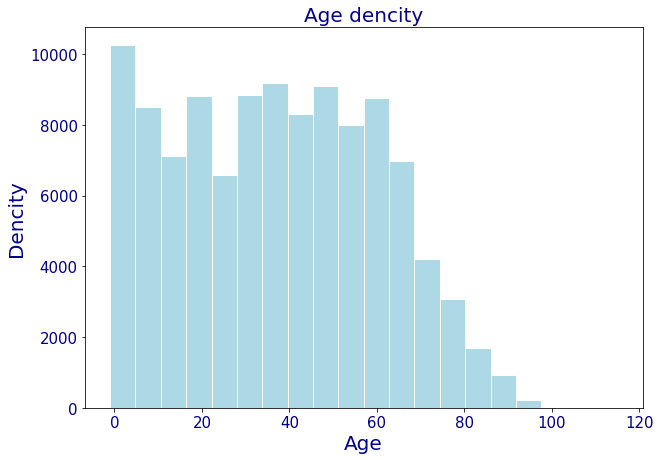

In [10]:
fig,ax=plt.subplots(figsize=(10,7))
plt.hist(df['Age'],color='lightblue',bins=20,edgecolor='white')
plt.xticks(fontsize=15,color='darkblue')
plt.yticks(fontsize=15,color='darkblue')
font={'size':20,'color':'darkblue'}
plt.xlabel('Age',fontdict=font)
plt.ylabel('Dencity',fontdict=font)
ax.set_title('Age dencity',fontdict=font);

The age is right skewed.

In [11]:
#Count of rows with age =-1.
df.loc[df[df['Age']==-1].index,'Age'].count()

1

In [12]:
#Count of rows with age =0.
df.loc[df[df['Age']==0].index,'Age'].count()

3539


There is rows with age =-1 which is illogical, the age is right skewed so we replace the wrong values with the median not the mean.
There are rows with age = 0, which means kids younger than a year.

In [13]:
df.loc[df[df['Age']==-1].index,'Age']=df['Age'].median()

In [14]:
#counts of values for Handcap feature
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handicap column has the wrong values (2,3,3), and it's not normally distributed, so we will change it to the median.

In [15]:
df.loc[df[df['Handcap']==2].index,'Handcap']=df['Handcap'].median()
df.loc[df[df['Handcap']==3].index,'Handcap']=df['Handcap'].median()
df.loc[df[df['Handcap']==4].index,'Handcap']=df['Handcap'].median()

In [16]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,4,4,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,4,4,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,4,4,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,4,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,4,4,56,JARDIM DA PENHA,0,1,1,0,0,0,No


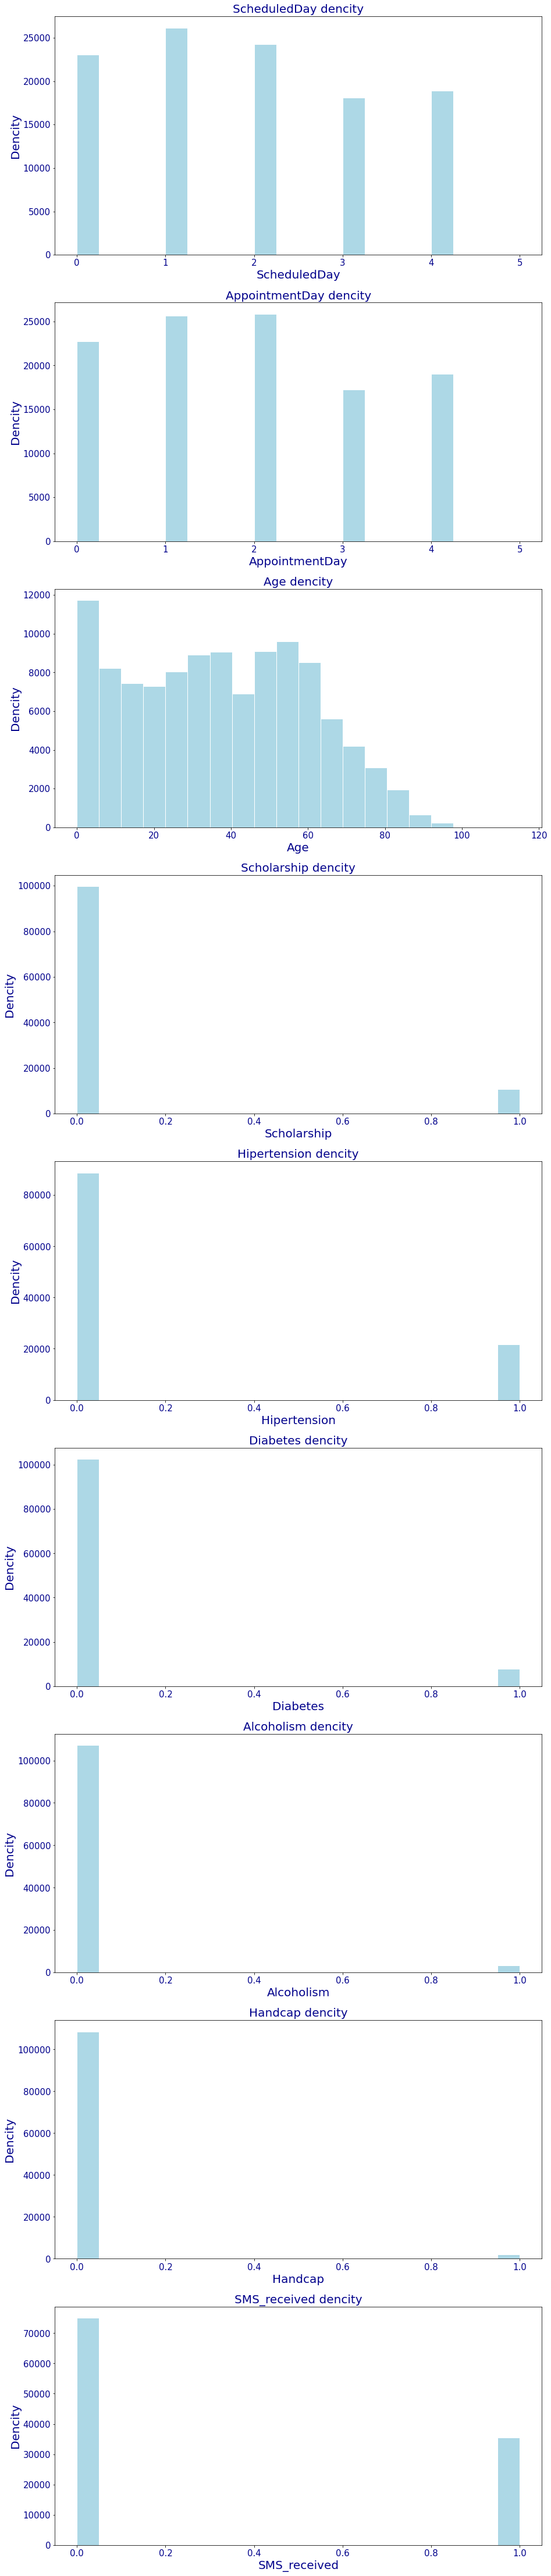

In [17]:

col=df.select_dtypes(include=np.number).columns.to_list()
plt.figure(figsize=(15,80))
for i ,v in enumerate(col):
    plt.subplot(len(col),1,i+1)
    plt.hist(df[v],color='lightblue',bins=20,edgecolor='white')
    plt.xticks(fontsize=15,color='darkblue')
    plt.yticks(fontsize=15,color='darkblue')
    plt.xlabel(v,fontdict=font)
    plt.ylabel('Dencity',fontdict=font)
    plt.title('{} dencity'.format(v),fontdict=font);

### From above:
All the features are not normal distributed.
the patients who received SMS are less than the half of the patients who didn't.
the patients with a young age are much than the old age patients.

<a id='eda'></a>
## Exploratory Data Analysis

In [18]:
#Some basic statistics.
df.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.851955,1.858243,37.089218,0.098266,0.197246,0.071865,0.030400,0.018475,0.321026
std,1.378520,1.371672,23.109921,0.297675,0.397921,0.258265,0.171686,0.134662,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,5.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Research Question 1 (Is the gender affect on patient adherence to appointments!)

In [19]:
def plot_fu(col1,tit):
    fig,ax=plt.subplots(figsize=(10,7))
    sns.countplot(col1)
    plt.xlabel('Attendance state for '+tit,fontdict=font)
    plt.ylabel('Count',fontdict=font)
    ax.set_title('Counts of appointment missing for '+tit,fontdict=font)
    plt.xticks(fontsize=15,color='darkblue')
    plt.yticks(fontsize=15,color='darkblue');

In [20]:
def plot_pie(x,lab,tit):
    fig,ax=plt.subplots(figsize=(8,8))
    fon={'size':14,'color':'darkblue'}
    colors = sns.color_palette('bright')
    plt.pie(x.values,labels=lab,colors=colors,autopct='%.0f%%', textprops={'fontsize': 14,'color':'darkblue'})
    ax.set_title('Percentage of appointment missing '+tit,fontdict=fon)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


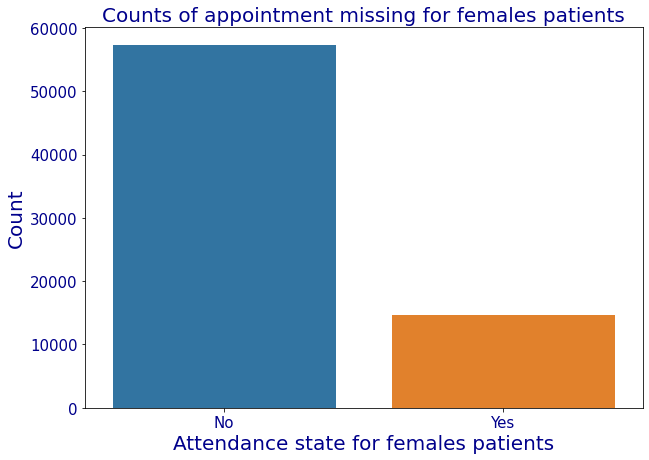

In [21]:
plot_fu(df[df['Gender']=='F']['No-show'],'females patients')

For female patients there are about 12000 who didn't atten the appointment and about 57000 who atten it.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


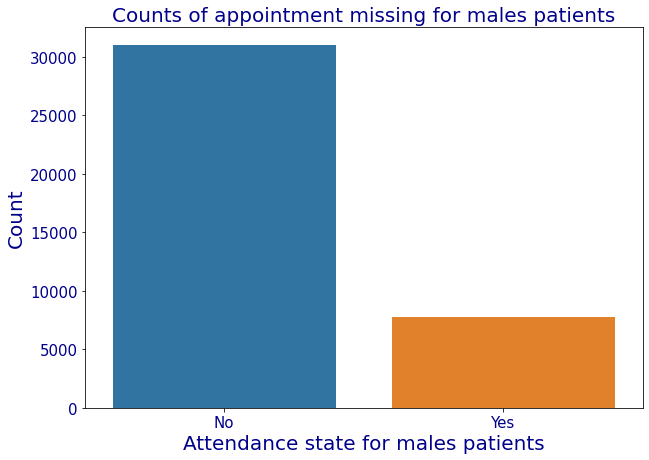

In [22]:
plot_fu(df[df['Gender']=='M']['No-show'],'males patients')


For male patients there are about 7000 who didn't atten the appointment and about 31000 who atten it.

In [23]:
# Percentage of the male patients who did not show up to their appointment to all males patients
(df[(df['Gender']=='M')&(df['No-show']=='Yes')]['No-show'].count()/df[df['Gender']=='M'].shape[0])*100

19.967947889471915

In [24]:
# Percentage of the female patients who did not show up to their appointment to all female patients
(df[(df['Gender']=='F')&(df['No-show']=='Yes')]['No-show'].count()/df[df['Gender']=='F'].shape[0])*100

20.31458797327394

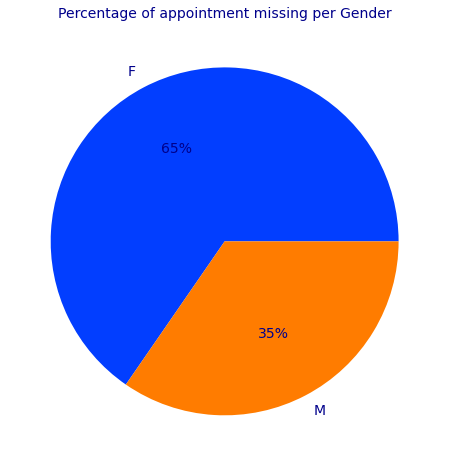

In [25]:
x=df[df['No-show']=='Yes'].groupby('Gender')['Gender'].size()
plot_pie(x,x.index,'per Gender')

### From above:
   The percentage of the male patients who did not show up to their appointment to all males patients is a little lower from the female patients, the percentage of patients who missed their appointment from males 35%, and females= 65% from all who missed it.

### Research Question 2 (Is the Scholarship affect on patient adherence to appointments!)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


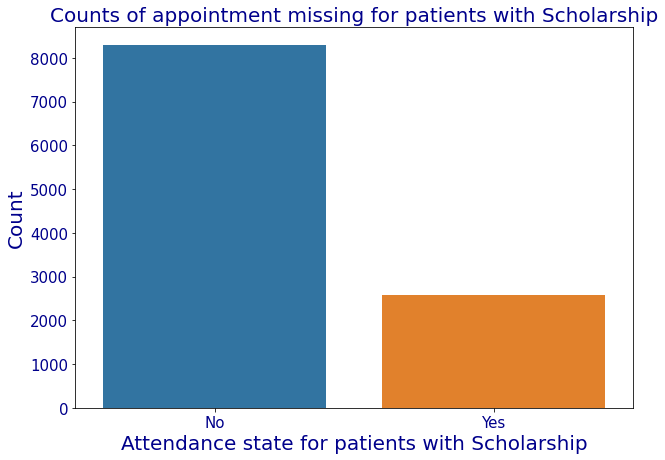

In [26]:
plot_fu(df[df['Scholarship']==1]['No-show'],'patients with Scholarship')


For patients who have scholarship there are about 2500 who didn't atten the appointment and about 8000 who atten it.

In [27]:
# The percentage of patients who enrolled in Brasilian welfare program who did not show up to their appointment
(df[(df['Scholarship']==1)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Scholarship']==1].shape[0])*100


23.73630420771568

In [28]:
#The percentage of patients who not enrolled in Brasilian welfare program who did not show up to their appointment
(df[(df['Scholarship']==0)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Scholarship']==0].shape[0])*100

19.807155900708366

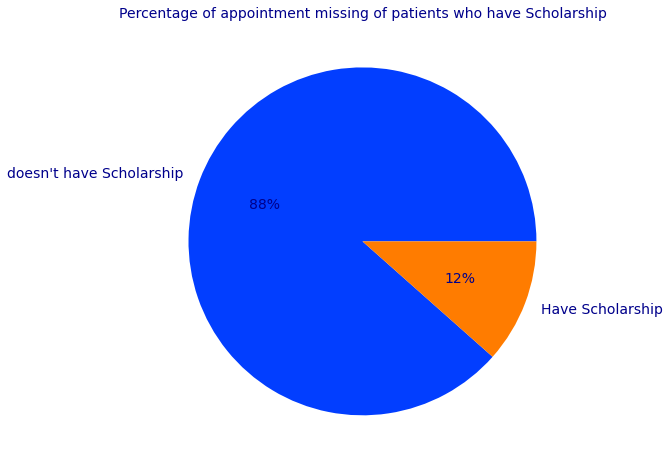

In [29]:
x=df[df['No-show']=='Yes'].groupby('Scholarship')['Scholarship'].size()
plot_pie(x,lab=["doesn't have Scholarship",'Have Scholarship'],tit='of patients who have Scholarship')

The percentage of patients who enrolled in Brasilian welfare program who did not show up to their appointment is higher than who not in it, the percentage of patients who missed their appointment from who have scholarship= 12%, and who have not= 88% from all who missed it.

### Research Question 3 (Are hypertensive patients more adherence to appointments!)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


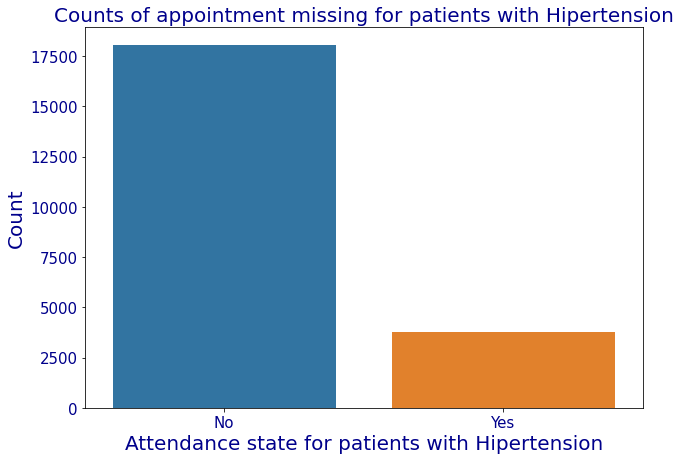

In [30]:
plot_fu(df[df['Hipertension']==1]['No-show'],'patients with Hipertension')


For patients with hipertension there are about 3000 who didn't atten the appointment and about 17500 who atten it.

In [31]:
# The percentage of patients who have hipertension who did not show up to their appointment to all patients
(df[(df['Hipertension']==1)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Hipertension']==1].shape[0])*100

17.301958625751112

In [32]:
# The percentage of patients who have hipertension who attend their appointment to all patients
(df[(df['Hipertension']==0)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Hipertension']==0].shape[0])*100

20.903680995424114

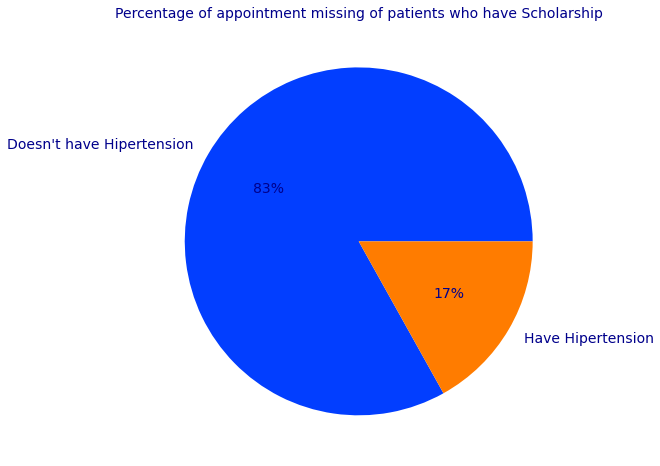

In [33]:
x=df[df['No-show']=='Yes'].groupby('Hipertension')['Hipertension'].size()
plot_pie(x,lab=["Doesn't have Hipertension",'Have Hipertension'],tit='of patients who have Scholarship')

The percentage of patients who have hipertension who did not show up to their appointment is higher than who not have,the percentage of patients who missed their appointment from who have hipertension= 17%, and from who have not= 83% from all who missed it.

### Research Question 4 (Are Diabetes patients more adherence to appointments!)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


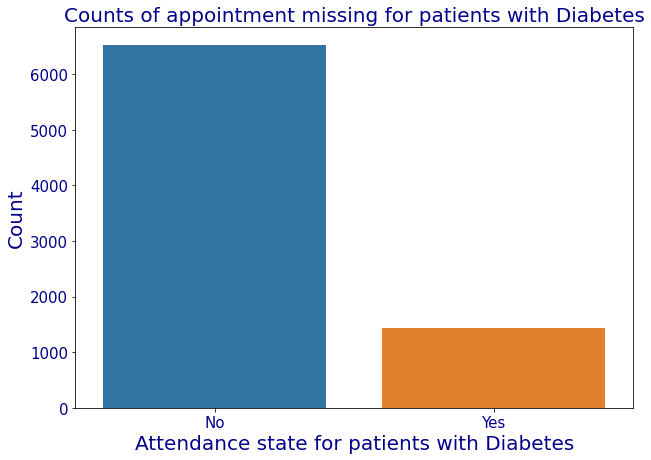

In [34]:
plot_fu(df[df['Diabetes']==1]['No-show'],'patients with Diabetes')


For patients with Diabetes there are about 1100 who didn't atten the appointment and about 6500 who atten it

In [35]:
# The percentage of patients who have Diabetes who did not show up to their appointment to all patients
(df[(df['Diabetes']==1)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Diabetes']==1].shape[0])*100

18.00327332242226

In [36]:
# The percentage of patients who have Diabetes who attend their appointment to all patients
(df[(df['Diabetes']==0)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Diabetes']==0].shape[0])*100

20.362824612025268

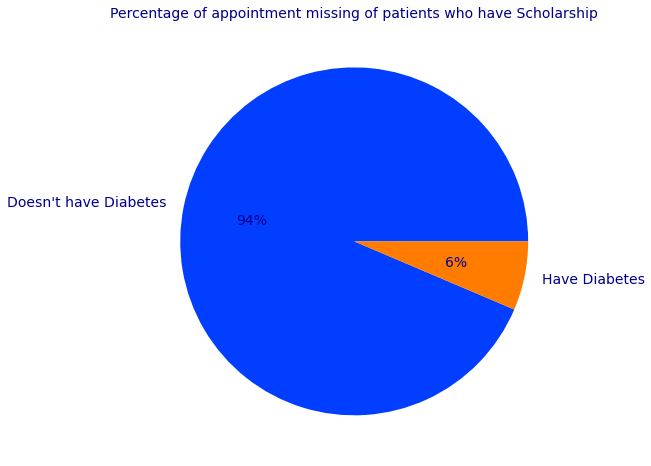

In [37]:
x=df[df['No-show']=='Yes'].groupby('Diabetes')['Diabetes'].size()
plot_pie(x,lab=["Doesn't have Diabetes",'Have Diabetes'],tit='of patients who have Scholarship')

The percentage of patients who have Diabetes who did not show up to their appointment is higher than who not have, the percentage of patients who missed their appointment from who have Diabetes= 6%, and from who have not't= 94% from all who missed it.

### Research Question 5 (Are drinker more or less adherence to appointments!)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


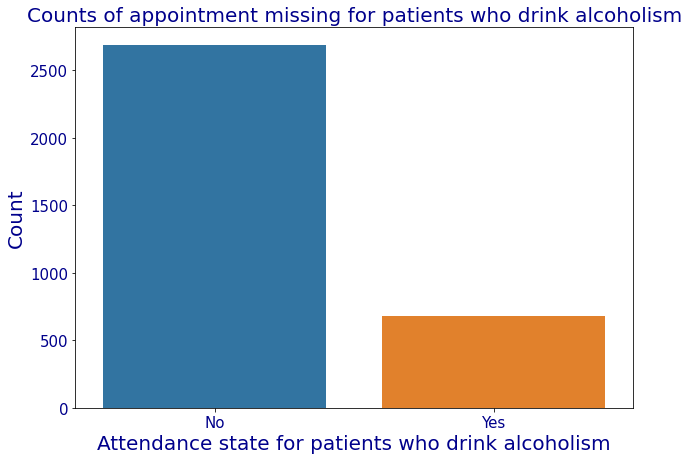

In [38]:
plot_fu(df[df['Alcoholism']==1]['No-show'],'patients who drink alcoholism')


For patients who drink alcoholism there are about 600 who didn't atten the appointment and about 2700 who atten it

In [39]:
# percentage of patients who drink alcoholism  who did not show up to their appointment to all patients
(df[(df['Alcoholism']==1)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Alcoholism']==1].shape[0])*100

20.148809523809526

In [40]:
# percentage of patients who drink alcoholism  who attend their appointment to all patients
(df[(df['Alcoholism']==0)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Alcoholism']==0].shape[0])*100

20.194649472318904

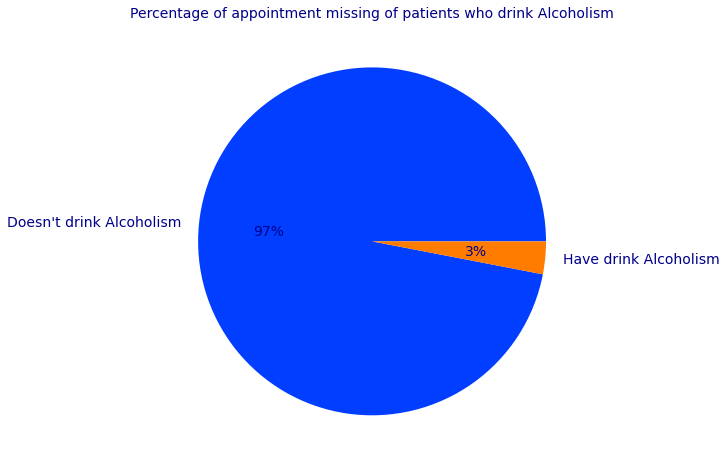

In [41]:
x=df[df['No-show']=='Yes'].groupby('Alcoholism')['Alcoholism'].size()
plot_pie(x,lab=["Doesn't drink Alcoholism",'Have drink Alcoholism'],tit='of patients who drink Alcoholism')

There is no difference between the percentage of patients who drink alcoholism who did not show up to their appointment and who not drink it, , the percentage of patients who missed their appointment from who drink alcoholism= 3%, and from who don't= 97% from all who missed it.

### Research Question 6 (Are handcap patients more adherence to appointments!)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


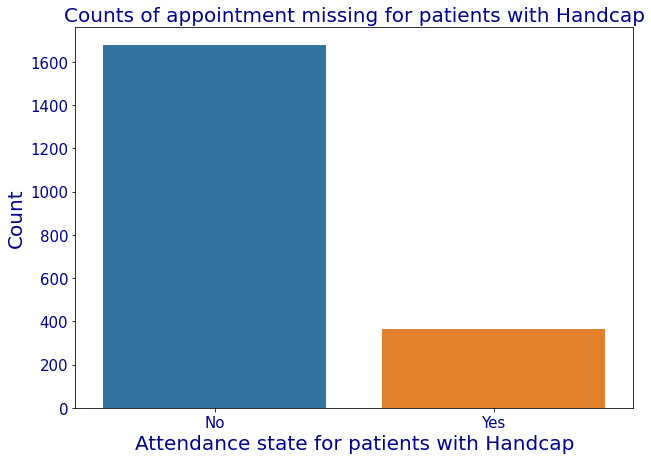

In [42]:
plot_fu(df[df['Handcap']==1]['No-show'],'patients with Handcap')


For patients who have handcap there are about 380 who didn't atten the appointment and about 1650 who atten it

In [43]:
# The percentage of patient who have handcap who did not show up to their appointment to all patients
(df[(df['Handcap']==1)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Handcap']==1].shape[0])*100

17.92360430950049

In [44]:
# The percentage of patient who have handcap who attend their appointment to all patients
(df[(df['Handcap']==0)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Handcap']==0].shape[0])*100

20.235977324054016

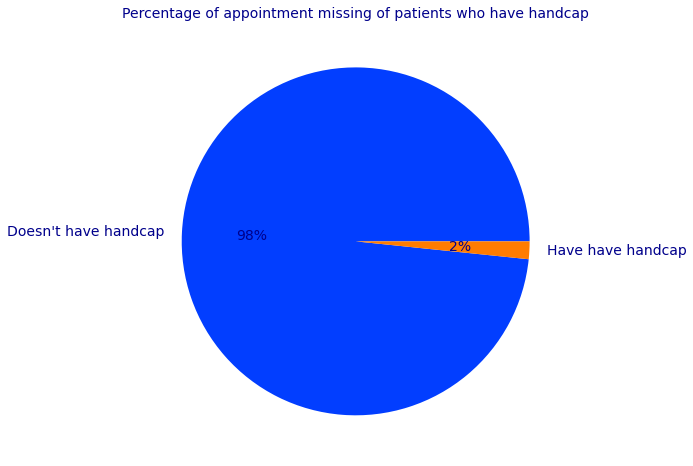

In [45]:
x=df[df['No-show']=='Yes'].groupby('Handcap')['Handcap'].size()
plot_pie(x,lab=["Doesn't have handcap",'Have have handcap'],tit='of patients who have handcap')

The percentage of patient who have handcap who did not show up to their appointment is higher than who not have, the percentage of patients who missed their appointment from who have handcap= 2%, and from who have not= 98% from all who missed it.

### Research Question 7 (Are  patients who received SMS more adherence to appointments!)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


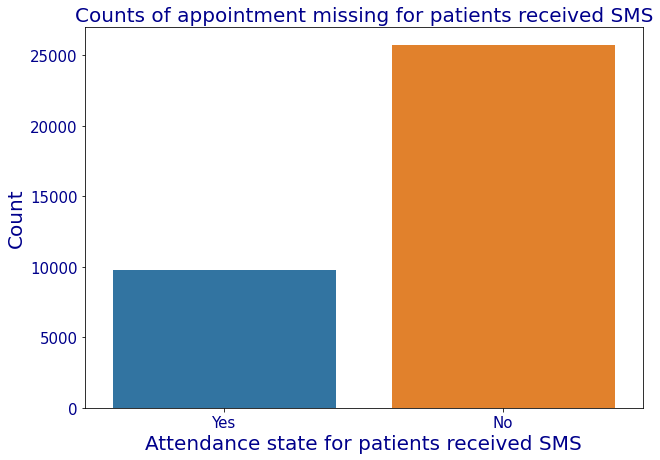

In [46]:
plot_fu(df[df['SMS_received']==1]['No-show'],'patients received SMS')


For patients who received SMS massage there are about 9000 who didn't atten the appointment and about 25000 who atten it

In [47]:
#The percentage of patient who received SMS massage who did not show up to their appointment to all patients
(df[(df['SMS_received']==1)&(df['No-show']=='Yes')]['No-show'].count()/df[df['SMS_received']==1].shape[0])*100

27.574544839637

In [48]:
#The percentage of patient who received SMS massage who attend their appointment to all patients
(df[(df['SMS_received']==0)&(df['No-show']=='Yes')]['No-show'].count()/df[df['SMS_received']==0].shape[0])*100

16.703311346525417

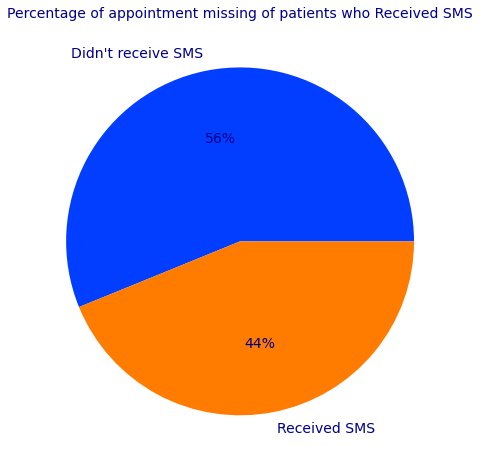

In [49]:
x=df[df['No-show']=='Yes'].groupby('SMS_received')['SMS_received'].size()
plot_pie(x,lab=["Didn't receive SMS",'Received SMS'],tit='of patients who Received SMS')


The percentage of patient who received SMS massage who did not show up to their appointment is higher than who did not received, the percentage of patients who missed their appointment from who received SMS= 44%, and from who did not= 56% from all who missed it.

### Research Question 8 (Is age patients affect adherence to appointments!)

''

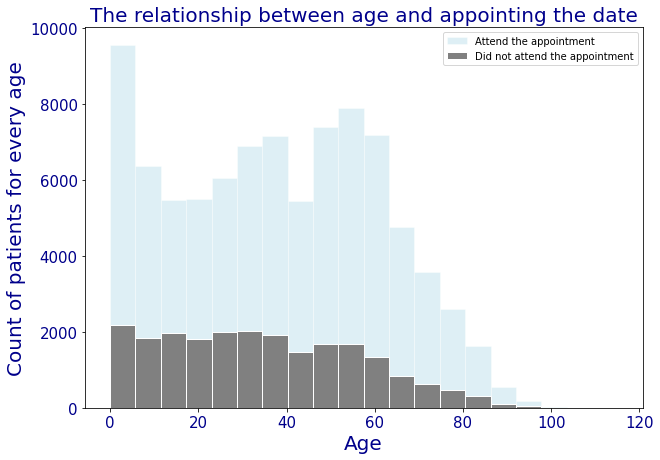

In [50]:
fig,ax=plt.subplots(figsize=(10,7))
font2={'size':10,'color':'darkblue'}
plt.hist(df[df['No-show']=='No']['Age'],alpha=.4,color='lightblue',bins=20,edgecolor='white')
plt.hist(df[df['No-show']=='Yes']['Age'],color='gray',bins=20,edgecolor='white')
plt.title('The relationship between age and appointing the date',fontdict=font)
plt.legend(['Attend the appointment',"Did not attend the appointment"])
font2={'size':10,'color':'darkblue'}
plt.xlabel('Age',fontdict=font)
plt.ylabel('Count of patients for every age',fontdict=font)
plt.xticks(fontsize=15,color='darkblue')
plt.yticks(fontsize=15,color='darkblue')
;

There is no difference between the distribution of age for the patients who attend the appointment and who missed it except the attended patientes numbers are much higher who didn't and there is huge number of who younger than 5 in the attend patientes distribution.

In [51]:
#The percentage of patient who younger than 18 massage who did not show up to their appointment to all patients
(df[(df['Age']<18)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Age']<18].shape[0])*100

21.903648781913144

In [52]:
#The percentage of patient who elder than 60 massage who did not show up to their appointment to all patients
(df[(df['Age']>60)&(df['No-show']=='Yes')]['No-show'].count()/df[df['Age']>60].shape[0])*100

15.21101103127214


The percentage of patient who younger than 18 massage who did not show up to their appointment is much higher than who elder than 60.

### Research Question 9 (Are  days of week affect on patients adherence to appointments!)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


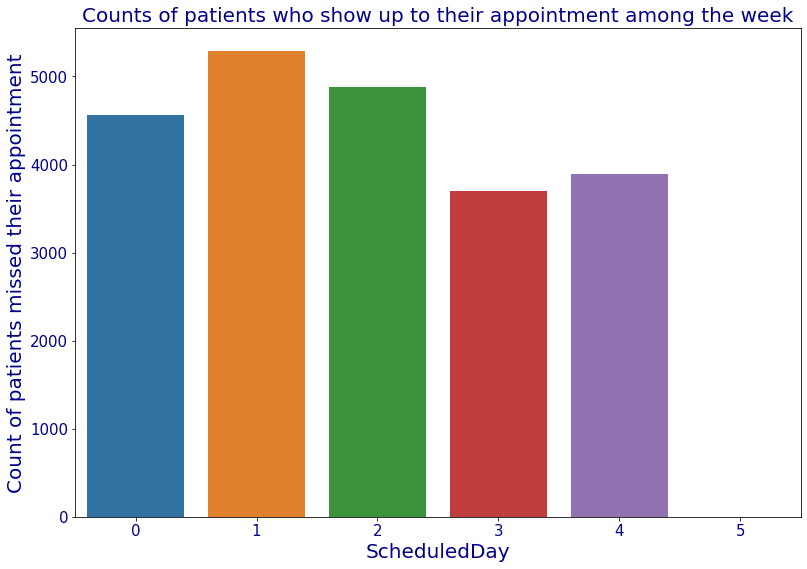

In [53]:
fig,ax=plt.subplots(figsize=(13,9))
sns.countplot(df[df['No-show']=='Yes']['ScheduledDay'])
plt.xlabel('ScheduledDay',fontdict=font)
plt.ylabel('Count of patients missed their appointment',fontdict=font)
ax.set_title('Counts of patients who show up to their appointment among the week',fontdict=font)
plt.xticks(fontsize=15,color='darkblue')
plt.yticks(fontsize=15,color='darkblue');

we could notes that:
on weekdays more patients have appointments so there is more patients miss there appointments

### Research Question 10 (Are neighbourhood affect on patients adherence to appointments!)

In [54]:
#Top twenty Neighbourhoods where patients show up to their appointment
df[df['No-show']=='Yes'].groupby('Neighbourhood')['No-show'].count().sort_values().head(20)

Neighbourhood
AEROPORTO                       1
ILHA DO FRADE                   2
ILHAS OCEÂNICAS DE TRINDADE     2
ILHA DO BOI                     3
PONTAL DE CAMBURI              12
MORADA DE CAMBURI              16
SEGURANÇA DO LAR               28
NAZARETH                       29
UNIVERSITÁRIO                  32
SANTA HELENA                   37
HORTO                          42
DE LOURDES                     47
FRADINHOS                      48
ANTÔNIO HONÓRIO                50
ENSEADA DO SUÁ                 52
MÁRIO CYPRESTE                 54
COMDUSA                        56
BOA VISTA                      58
ARIOVALDO FAVALESSA            62
SOLON BORGES                   69
Name: No-show, dtype: int64

In [55]:
#Top twenty Neighbourhoods where patients did not show up to their appointment
df[df['No-show']=='Yes'].groupby('Neighbourhood')['No-show'].count().sort_values(ascending=False).head(20)

Neighbourhood
JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
ILHA DO PRÍNCIPE      532
ANDORINHAS            521
SÃO PEDRO             515
SANTO ANDRÉ           508
SANTA MARTHA          496
SANTO ANTÔNIO         484
ROMÃO                 474
GURIGICA              456
JABOUR                451
DA PENHA              429
Name: No-show, dtype: int64

In [56]:
#Lowest twenty Neighbourhoods where patients show up to their appointment
df[df['No-show']=='No'].groupby('Neighbourhood')['No-show'].count().sort_values().head(20)

Neighbourhood
PARQUE INDUSTRIAL        1
AEROPORTO                7
ILHA DO FRADE            8
ILHA DO BOI             32
PONTAL DE CAMBURI       57
MORADA DE CAMBURI       80
NAZARETH               106
SEGURANÇA DO LAR       117
UNIVERSITÁRIO          120
HORTO                  133
SANTA HELENA           141
ENSEADA DO SUÁ         183
FRADINHOS              210
ARIOVALDO FAVALESSA    220
ANTÔNIO HONÓRIO        221
COMDUSA                254
BOA VISTA              254
DE LOURDES             258
MÁRIO CYPRESTE         317
DO MOSCOSO             321
Name: No-show, dtype: int64

In [57]:
#Top twenty Neighbourhoods where patients show up to their appointment
df[df['No-show']=='No'].groupby('Neighbourhood')['No-show'].count().sort_values(ascending=False).head(20)

Neighbourhood
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
CENTRO               2631
ITARARÉ              2591
TABUAZEIRO           2559
SANTO ANTÔNIO        2262
BONFIM               2223
JESUS DE NAZARETH    2157
SANTO ANDRÉ          2063
JABOUR               2058
CARATOÍRA            1974
SÃO PEDRO            1933
NOVA PALESTINA       1862
DA PENHA             1788
ANDORINHAS           1741
ROMÃO                1741
ILHA DO PRÍNCIPE     1734
Name: No-show, dtype: int64

The neighborhood where have the lowest number of patients who did not show up to their appointment is AEROPORTO (one patient).
The neighborhood where have the higher number of patients who did not show up to their appointment is JARDIM CAMBURI (1465 patients).

### Research Question 11 (What is the correlation between the features!)

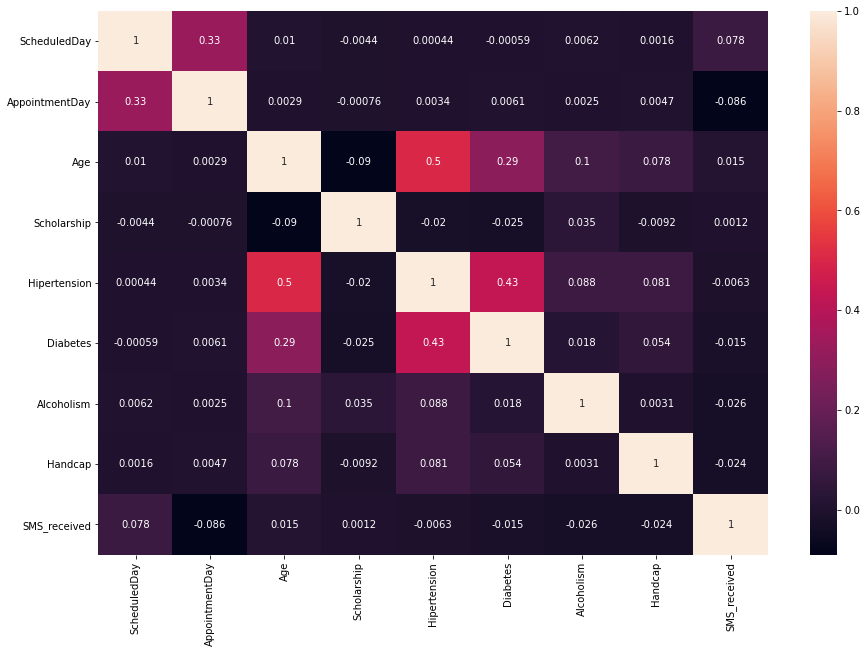

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='spearman'),annot=True);

From above:
    There is positive correlation between age and patients having diabetes and hipertensis.

# ML:
### Building a model to classifier the patients between who missed there appointment and who did not.

In [59]:
df2=df.copy()
df2=pd.get_dummies(df,columns=(['Gender','No-show']),drop_first=True)

In [60]:
df2.head()

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_M,No-show_Yes
0,4,4,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,4,4,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4,4,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,4,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,4,4,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection  import train_test_split
x=df2.drop('Neighbourhood',axis=1)
y=df2['No-show_Yes']
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [62]:
minmax=MinMaxScaler()
x_train_s=minmax.fit_transform(x_train)
x_test_s=minmax.transform(x_test)

The data isn't normally  distributed so we used minmaxscaler

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(x_train_s,y_train)
clf.score(x_test_s,y_test)

1.0

The score is 1 and that mean he did't miss classified any point from the test data

In [64]:
pred=clf.predict(x_test_s)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:

print(confusion_matrix(y_test,pred))

[[22151     0]
 [    0  5481]]


In [67]:
target_names=['Missing the meeting',"Didn't miss the meeting"]
print(classification_report(y_test,pred,target_names=target_names))

                         precision    recall  f1-score   support

    Missing the meeting       1.00      1.00      1.00     22151
Didn't miss the meeting       1.00      1.00      1.00      5481

               accuracy                           1.00     27632
              macro avg       1.00      1.00      1.00     27632
           weighted avg       1.00      1.00      1.00     27632



### From above:
The recall is 1 and that mean the model didn't wrong classify any patient from the test data what ever he realy miss the meating or not.
The precision is 1 and that mean if the model classified any patient from the test data he miss the meeting means he realy miss or if the model classified any patient he didn't miss the meeting means he  realy didn't miss.

<a id='conclusions'></a>
## Conclusions

> 1- From the dataset we found the most important features to classify if the patient will miss his appointment or not are SMS messages, the age, enrolment in welfare programs and if he have a dangerous sick such as hipertension.
> 
> 2- Most of patients did not receive SMS message which is not good for attendance.
<a id='conclusions'></a>
### Limitations

> 1-There is no missing values on this data which is good but on the other hand there is wronge values on age and Handcap features.
> 
> 2-Most of the data features are categories but Except for the neighborhood feature, most of the data features are represented numerically.
> 
> 3-Most of the features are categories so there are no high correlation between it.